In [1]:
#pip install sweetviz

In [2]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sweetviz as sv

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
#import flat file from SQL
#-------------------------

conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-MLT0SLQ\SQLEXPRESS;'
                      'Database=BoxOffice;'
                      'Trusted_Connection=yes;')
cursor = conn.cursor()
movies_df = pd.read_sql_query('SELECT * FROM DSuser01.movies_final order by id',conn)
movies_df.head()

,id,original_title,original_language,original_is_en,en,fr,es,de,ru,it,ja,popularity,popularity_cat,release_year,release_month,release_day,runtime,runtime_cat,status,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,TV Movie,War,Western,Art,Camera,Costume & Make-Up,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,Writing,actors_female_count,actors_male_count,revenue,budget,revenue_year_rank,yearly_revenue_sum,revenue_year_percent,rev_budg_ratio
0,1,Hot Tub Time Machine 2,en,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.575393,High,2015.0,2.0,20.0,93.0,Short,Released,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,8.0,13.0,4.0,4.0,2.0,4.0,9.0,10.0,4.0,2.0,8.0,10.0,12314651.0,14000000,72,1.329334e+10,0.09,0
1,2,The Princess Diaries 2: Royal Engagement,en,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.248895,High,2004.0,8.0,6.0,113.0,Medium,Released,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,1.0,0.0,1.0,10.0,10.0,95149435.0,40000000,26,6.665570e+09,1.43,0
2,3,Whiplash,en,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,64.299988,Superb,2014.0,10.0,10.0,105.0,Medium,Released,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,5.0,9.0,3.0,6.0,1.0,18.0,9.0,3.0,1.0,7.0,13.0,13092000.0,3300000,58,9.432880e+09,0.14,1
3,4,Kahaani,hi,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.174936,Medium,2012.0,3.0,9.0,122.0,Long,Released,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,16000000.0,1200000,63,1.077075e+10,0.15,1
4,5,????,ko,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.148070,Low,2009.0,2.0,5.0,118.0,Medium,Released,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,3923970.0,0,78,8.204226e+09,0.05,999


In [5]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 58 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7398 non-null   int64  
 1   original_title        7398 non-null   object 
 2   original_language     7398 non-null   object 
 3   original_is_en        7398 non-null   int64  
 4   en                    7336 non-null   float64
 5   fr                    7336 non-null   float64
 6   es                    7336 non-null   float64
 7   de                    7336 non-null   float64
 8   ru                    7336 non-null   float64
 9   it                    7336 non-null   float64
 10  ja                    7336 non-null   float64
 11  popularity            7398 non-null   float64
 12  popularity_cat        7398 non-null   object 
 13  release_year          7397 non-null   float64
 14  release_month         7397 non-null   float64
 15  release_day          

In [6]:
# set id column as index
movies_df = movies_df.set_index("id")

In [7]:
#Set columns as categorical
col_names = ['original_language', 'original_is_en', 'en',
       'fr', 'es', 'de', 'ru', 'it', 'ja', 'popularity_cat',
       'runtime_cat', 'status', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'Thriller', 'TV Movie', 'War', 'Western', 'rev_budg_ratio']
for col in col_names:
    movies_df[col] = pd.Categorical( movies_df[col])
    
movies_df.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7398 entries, 1 to 7398
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   original_title        7398 non-null   object  
 1   original_language     7398 non-null   category
 2   original_is_en        7398 non-null   category
 3   en                    7336 non-null   category
 4   fr                    7336 non-null   category
 5   es                    7336 non-null   category
 6   de                    7336 non-null   category
 7   ru                    7336 non-null   category
 8   it                    7336 non-null   category
 9   ja                    7336 non-null   category
 10  popularity            7398 non-null   float64 
 11  popularity_cat        7398 non-null   category
 12  release_year          7397 non-null   float64 
 13  release_month         7397 non-null   float64 
 14  release_day           7397 non-null   float64 
 15  runt

In [8]:
#movies_df.head(10)

###  1. Descriptive statistics Summary 
Range, Central tendency and Dispersion

In [9]:
numeric_col_summary = movies_df.describe()
numeric_col_summary

,popularity,release_year,release_month,release_day,runtime,Art,Camera,Costume & Make-Up,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,Writing,actors_female_count,actors_male_count,revenue,budget,revenue_year_rank,yearly_revenue_sum,revenue_year_percent
count,7.398000e+03,7397.000000,7397.000000,7397.000000,7392.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7338.000000,7338.000000,3.000000e+03,7.398000e+03,7398.000000,7.378000e+03,3000.000000
mean,8.514968e+00,1999.677031,6.842909,15.244559,107.717262,2.699728,1.797418,2.068342,2.381658,1.663723,1.512908,0.425136,5.288995,3.057473,1.286957,2.218614,4.633688,9.413055,6.672585e+07,2.260146e+07,66.124899,6.053113e+09,2.999950
std,1.216579e+01,15.370147,3.386287,8.598164,21.480040,4.114980,2.586904,3.550207,5.869035,1.365062,1.736821,1.234043,5.268008,4.514516,4.125757,1.627544,4.658537,7.369722,1.375323e+08,3.694867e+07,42.637156,3.616957e+09,9.770809
min,1.000000e-06,1918.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,1.000000,7.940000e+03,0.000000
25%,3.933124e+00,1992.000000,4.000000,8.000000,94.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,5.000000,2.379808e+06,0.000000e+00,28.000000,2.619875e+09,0.050000
50%,7.435844e+00,2004.000000,7.000000,15.000000,104.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,4.000000,1.000000,0.000000,2.000000,4.000000,8.000000,1.680707e+07,7.500000e+06,63.000000,7.131686e+09,0.440000
75%,1.092000e+01,2011.000000,10.000000,22.000000,118.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,8.000000,3.000000,0.000000,3.000000,6.000000,12.000000,6.891920e+07,2.800000e+07,106.000000,9.017211e+09,1.862500
max,5.474883e+02,2017.000000,12.000000,31.000000,338.000000,36.000000,24.000000,33.000000,119.000000,30.000000,21.000000,18.000000,38.000000,40.000000,89.000000,23.000000,87.000000,85.000000,1.519558e+09,3.800000e+08,141.000000,1.329334e+10,100.000000


#### Probable missing values:
values that are probably not actual data, and should be treated as missing values.

runtime min=0, 

actors_female_count min=0,

actors_male_count min=0

budget min=0

In [10]:
cat_col_summary = movies_df.describe(include= "category")
cat_col_summary

,original_language,original_is_en,en,fr,es,de,ru,it,ja,popularity_cat,runtime_cat,status,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,TV Movie,War,Western,rev_budg_ratio
count,7398,7398,7336.0,7336.0,7336.0,7336.0,7336.0,7336.0,7336.0,7398,7398,7396,7375.0,7375.0,7375.0,7375.0,7375.0,7375.0,7375.0,7375.0,7375.0,7375.0,7375.0,7375.0,7375.0,7375.0,7375.0,7375.0,7375.0,7375.0,7375.0,7375.0,7398
unique,44,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4,3,3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3
top,en,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Superb,Medium,Released,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
freq,6351,6351,6449.0,6625.0,6777.0,6917.0,6972.0,7015.0,7132.0,2771,4110,7385,5640.0,6259.0,6993.0,4770.0,6291.0,7154.0,3699.0,6700.0,6747.0,7291.0,7080.0,6640.0,7108.0,6825.0,5940.0,6631.0,5506.0,7374.0,7132.0,7258.0,4604


In [11]:
movies_df["popularity_cat"].value_counts(normalize=True)*100

Superb    37.456069
High      24.330900
Low       20.505542
Medium    17.707489
Name: popularity_cat, dtype: float64

In [12]:
movies_df["rev_budg_ratio"].value_counts(normalize=True)*100

0      62.233036
999    27.345228
1      10.421736
Name: rev_budg_ratio, dtype: float64

In [13]:
movies_df["runtime_cat"].value_counts(normalize=True)*100

Medium    55.555556
Short     23.384699
Long      21.059746
Name: runtime_cat, dtype: float64

### 2. Variables visualization 


In [14]:
#report = sv.analyze(movies_df)
#report.show_html('EDA_report.html')
#report in html file attached

<AxesSubplot:xlabel='id', ylabel='popularity'>

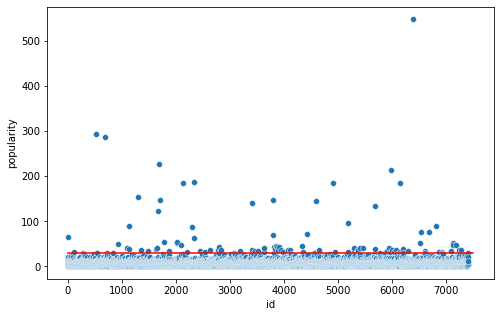

In [15]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="id", y= "popularity", data = movies_df)
sns.lineplot(x = [0,7500], y= [30,30], color = 'r' )

The popularity of most of the movies is lowre than 30

<AxesSubplot:xlabel='id', ylabel='budget'>

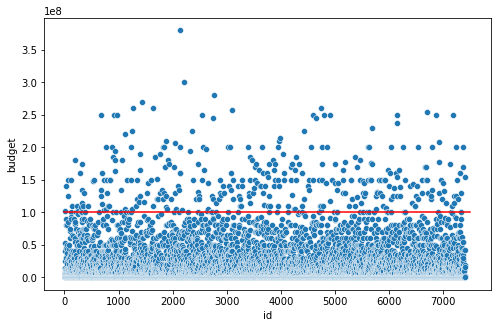

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="id", y= "budget", data = movies_df)
sns.lineplot(x = [0,7500], y= [100000000,100000000], color = 'r' )

The budget of most of the movies is lowre than 100,000,000 $

<AxesSubplot:xlabel='id', ylabel='revenue'>

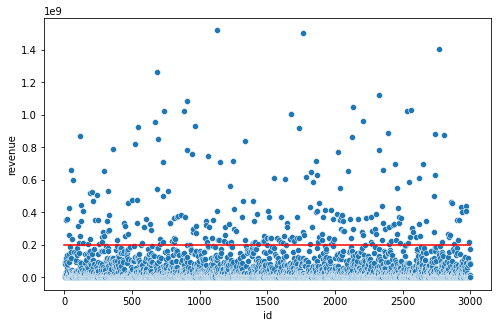

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="id", y= "revenue", data = movies_df)
sns.lineplot(x = [0,3000], y= [200000000,200000000], color = 'r' )

The revenue of most of the movies is lowre than 200,000,000 $

<AxesSubplot:xlabel='id', ylabel='actors_female_count'>

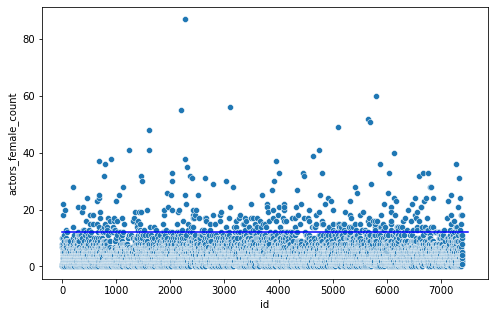

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="id", y= "actors_female_count", data = movies_df)
sns.lineplot(x = [0,7500], y= [12,12], color = 'b' )

Most movies have lees than 12 actresses.

<AxesSubplot:xlabel='id', ylabel='actors_male_count'>

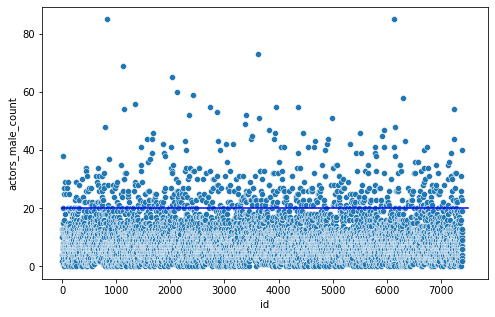

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="id", y= "actors_male_count", data = movies_df)
sns.lineplot(x = [0,7500], y= [20,20], color = 'b' )

Most movies have lees than 20 actors.

### 3. Correlation matrix

In [20]:
corrMatrix = movies_df.corr(method = 'spearman')
corrMatrix.style.background_gradient(cmap='coolwarm')

,popularity,release_year,release_month,release_day,runtime,Art,Camera,Costume & Make-Up,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,Writing,actors_female_count,actors_male_count,revenue,budget,revenue_year_rank,yearly_revenue_sum,revenue_year_percent
popularity,1.000000,0.135764,0.054342,0.048875,0.171623,0.442749,0.415828,0.388605,0.359830,0.308900,0.448285,0.320014,0.472122,0.450046,0.386043,0.279638,0.348166,0.477494,0.596192,0.518921,-0.070451,0.108697,0.484748
release_year,0.135764,1.000000,-0.049697,0.005813,0.003996,0.088650,0.010153,0.123703,0.143197,0.088221,0.028074,0.150335,0.220905,0.055145,0.222062,-0.035263,0.113206,-0.079722,0.017604,0.156404,0.682554,0.954797,-0.391914
release_month,0.054342,-0.049697,1.000000,-0.001238,0.127177,0.062888,0.045923,0.054001,0.019726,0.035899,0.053399,0.031183,0.039385,0.048386,0.020820,0.021809,0.045813,0.040646,0.034994,0.060617,-0.012025,-0.027251,0.063215
release_day,0.048875,0.005813,-0.001238,1.000000,0.028342,0.027629,0.034263,0.011604,0.026329,0.019850,0.031762,0.020915,0.016803,0.029447,0.035235,0.024748,0.017735,0.021941,0.061911,0.034830,-0.001450,0.006571,0.066378
runtime,0.171623,0.003996,0.127177,0.028342,1.000000,0.202869,0.221629,0.220264,0.158172,0.084440,0.175157,0.132493,0.150488,0.201328,0.068802,0.105438,0.127021,0.240042,0.261572,0.250989,-0.080125,-0.001619,0.244356
Art,0.442749,0.088650,0.062888,0.027629,0.202869,1.000000,0.695874,0.822224,0.621930,0.587275,0.682908,0.546036,0.688892,0.712060,0.528396,0.265672,0.302091,0.416962,0.387729,0.393197,-0.057059,0.075293,0.329971
Camera,0.415828,0.010153,0.045923,0.034263,0.221629,0.695874,1.000000,0.709980,0.537407,0.550941,0.731815,0.588267,0.649689,0.757363,0.450544,0.225101,0.249317,0.369788,0.356693,0.314279,-0.114587,-0.005203,0.336531
Costume & Make-Up,0.388605,0.123703,0.054001,0.011604,0.220264,0.822224,0.709980,1.000000,0.622922,0.582611,0.633276,0.569921,0.637414,0.681025,0.483574,0.193511,0.280340,0.359463,0.336293,0.329863,-0.023282,0.109367,0.272064
Crew,0.359830,0.143197,0.019726,0.026329,0.158172,0.621930,0.537407,0.622922,1.000000,0.582097,0.559394,0.610797,0.508644,0.651830,0.609969,0.238593,0.188465,0.321746,0.321740,0.330814,-0.013153,0.127740,0.248647
Directing,0.308900,0.088221,0.035899,0.019850,0.084440,0.587275,0.550941,0.582611,0.582097,1.000000,0.515261,0.536665,0.489854,0.597580,0.505003,0.226082,0.199075,0.271728,0.262704,0.266393,-0.033329,0.078738,0.222047


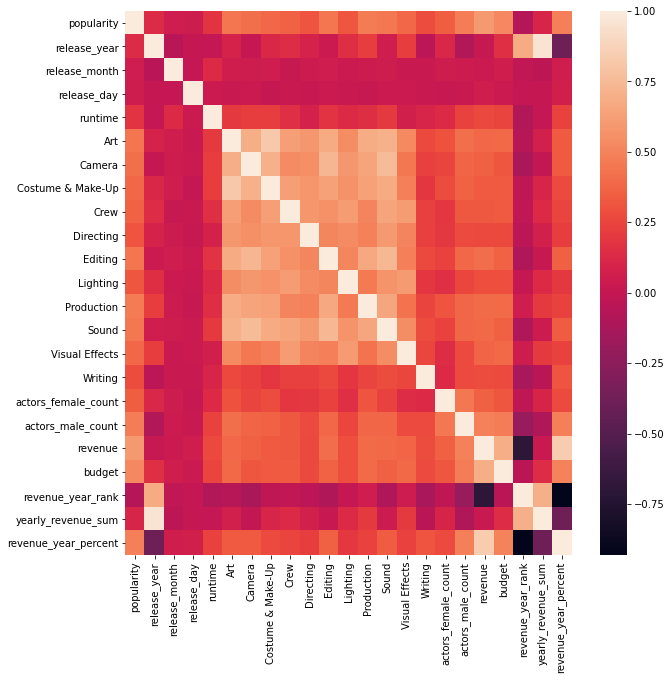

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(corrMatrix, annot=False)
plt.show()

<AxesSubplot:xlabel='actors_male_count', ylabel='actors_female_count'>

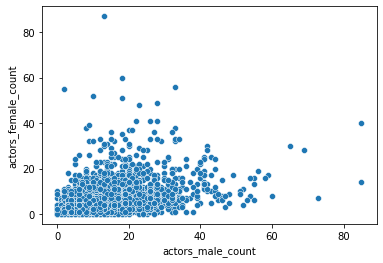

In [22]:
sns.scatterplot(x="actors_male_count", y= "actors_female_count", data = movies_df)

### 4. Exploring outcome variable - revenue

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revenue', ylabel='Density'>

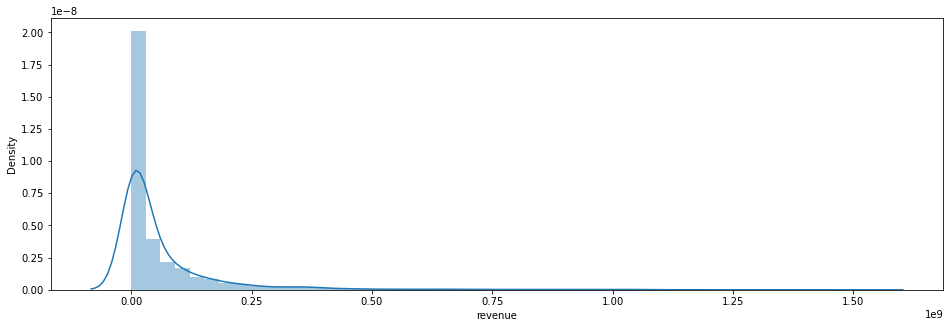

In [23]:
plt.figure(figsize=(16,5))
sns.distplot(movies_df['revenue'])

<AxesSubplot:xlabel='revenue', ylabel='Count'>

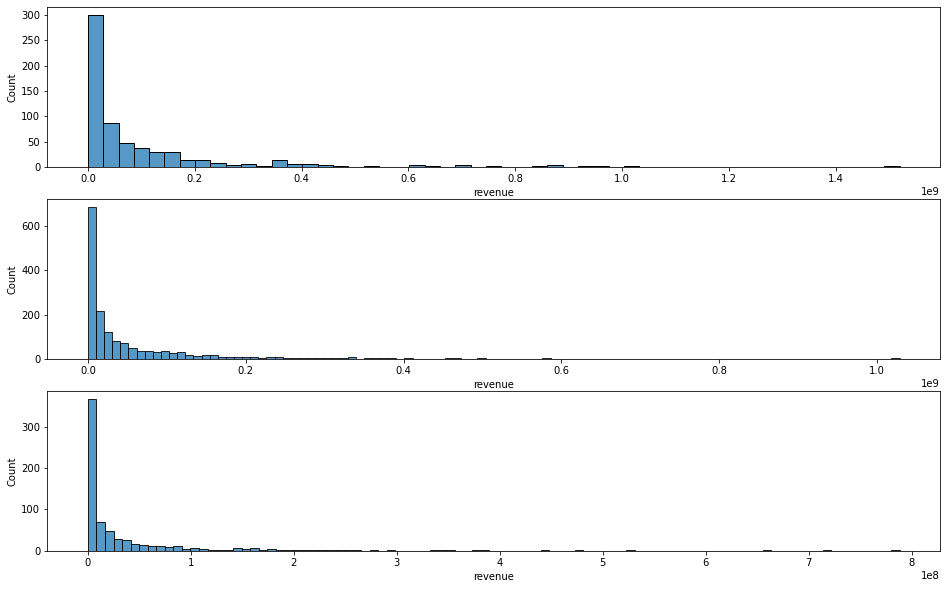

In [24]:
# How the revenue is affected by runtime_cat
fig, axes = plt.subplots(3,1, figsize=(16,10))
sns.histplot(x=movies_df.revenue[movies_df.runtime_cat == "Long"],ax=axes[0])
sns.histplot(x=movies_df.revenue[movies_df.runtime_cat == "Medium"],ax=axes[1])
sns.histplot(x=movies_df.revenue[movies_df.runtime_cat == "Short"],ax=axes[2])

<AxesSubplot:xlabel='runtime_cat', ylabel='revenue'>

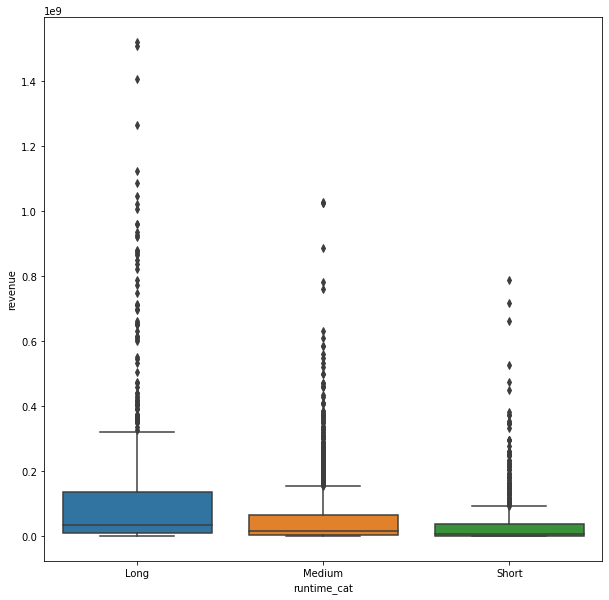

In [25]:
plt.figure(figsize=(10, 10))
sns.boxplot(x= movies_df.runtime_cat, y= movies_df.revenue)

<AxesSubplot:xlabel='revenue', ylabel='Count'>

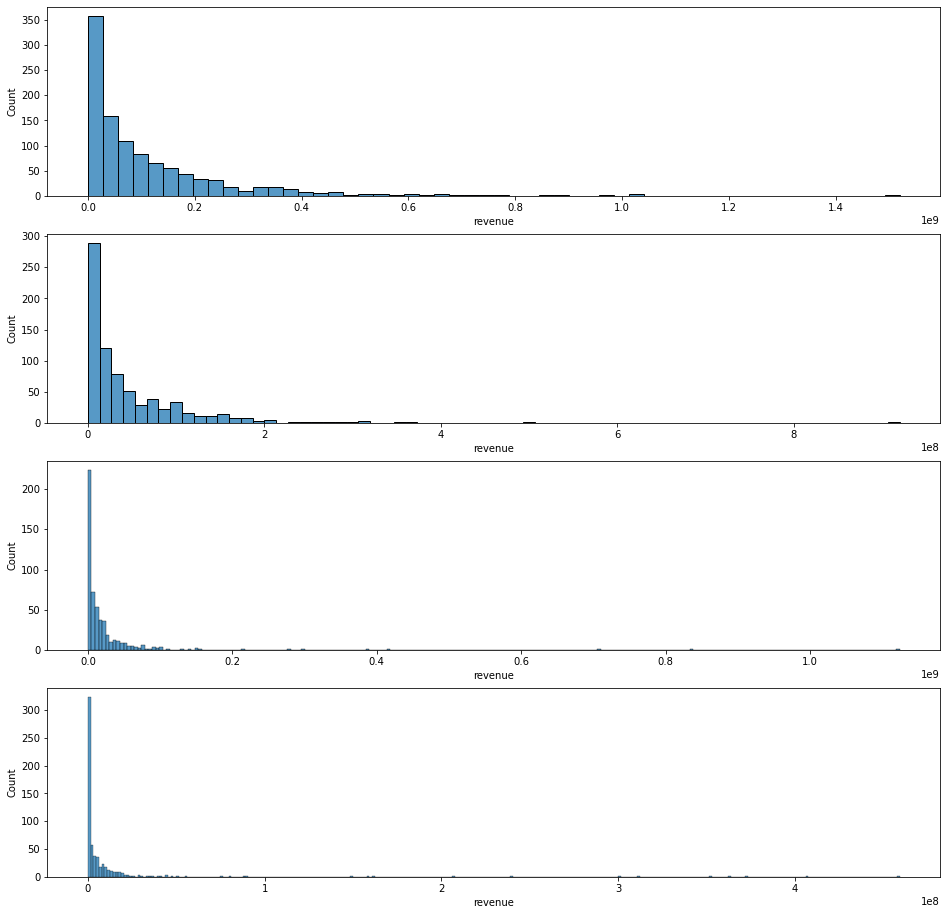

In [26]:
# How the revenue is affected by popularity_cat
fig, axes = plt.subplots(4,1, figsize=(16,16))
sns.histplot(x=movies_df.revenue[movies_df.popularity_cat == "Superb"],ax=axes[0])
sns.histplot(x=movies_df.revenue[movies_df.popularity_cat == "High"],ax=axes[1])
sns.histplot(x=movies_df.revenue[movies_df.popularity_cat == "Medium"],ax=axes[2])
sns.histplot(x=movies_df.revenue[movies_df.popularity_cat == "Low"],ax=axes[3])

<AxesSubplot:xlabel='budget', ylabel='revenue'>

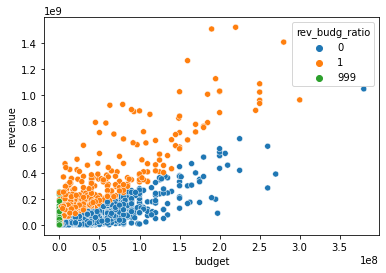

In [27]:
sns.scatterplot(x="budget", y= "revenue", hue = 'rev_budg_ratio', data = movies_df)

The graph shows the high positive correlation between budget and revenue (0.691).
rev_budg_ratio = 1 if the revenue is more than 3 times the budget, else = 0
999 = na

<AxesSubplot:xlabel='runtime', ylabel='revenue'>

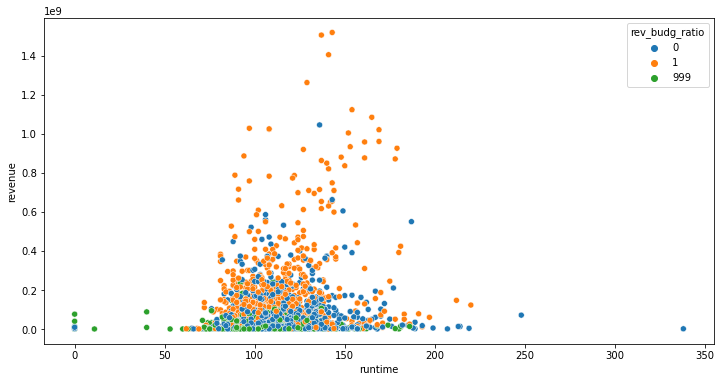

In [28]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="runtime", y= "revenue", hue = 'rev_budg_ratio',data = movies_df)

The graph shows the medium positive correlation between runtime and revenue (0.261).

<AxesSubplot:xlabel='popularity', ylabel='revenue'>

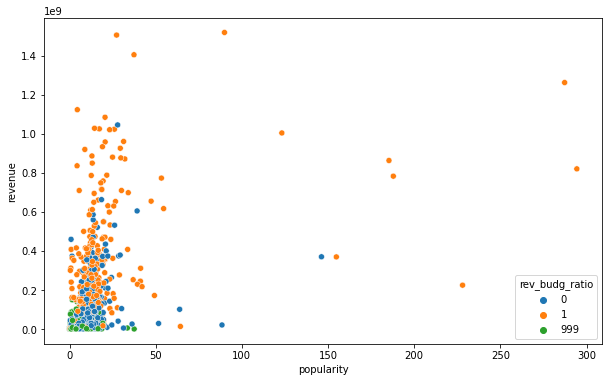

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="popularity", y= "revenue", hue = 'rev_budg_ratio', data = movies_df)

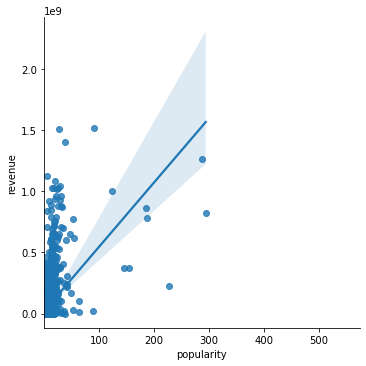

In [30]:
sns.lmplot(x="popularity", y= "revenue", data = movies_df)

The regression line shows that the high correlation between popularity and revenue (0.596) is affected by a few outliers. 

<AxesSubplot:xlabel='release_month', ylabel='revenue'>

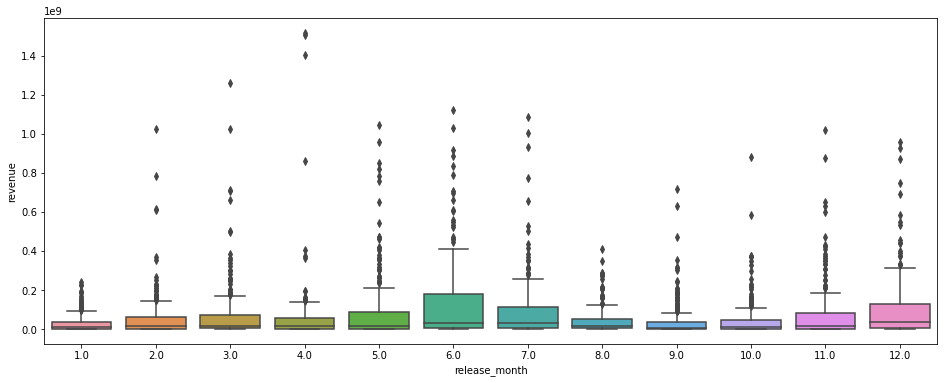

In [31]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="release_month", y= "revenue", data = movies_df)

The boxplot shows that the release month has an effect on the revenue.

<AxesSubplot:xlabel='original_is_en', ylabel='revenue'>

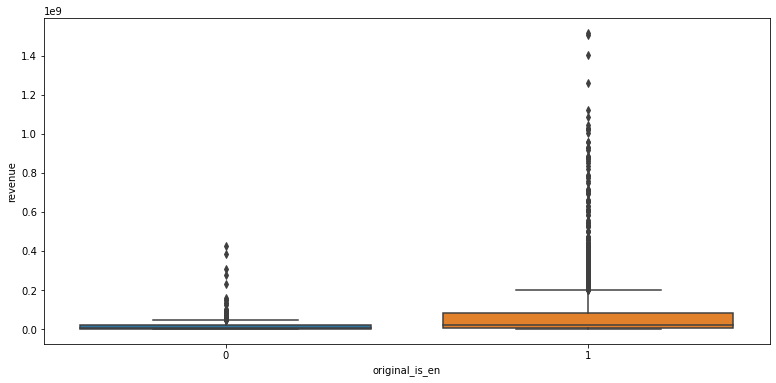

In [32]:
#Does English speaking movies have higher revenue?
plt.figure(figsize=(13, 6))
sns.boxplot(x="original_is_en", y= "revenue", data = movies_df)

In [33]:
x1 = movies_df.revenue[movies_df["original_is_en"] == 1]
x2 = movies_df.revenue[movies_df["original_is_en"] == 0]
stats.mannwhitneyu(x1,x2)

MannwhitneyuResult(statistic=2598135.5, pvalue=3.80157960231907e-30)

<AxesSubplot:xlabel='Sound', ylabel='revenue'>

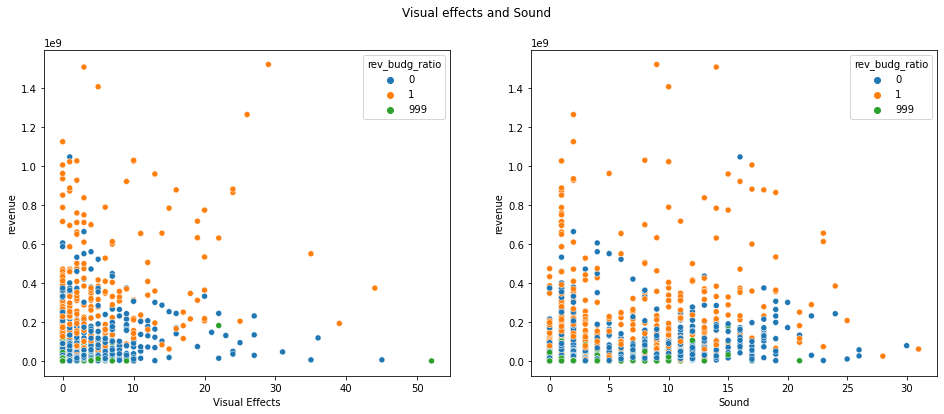

In [34]:
# Does the number of people working in the Visual effects and Sound departments have an effect on revenue?
fig, axes = plt.subplots(1,2, figsize=(16,6))
fig.suptitle('Visual effects and Sound')
sns.scatterplot(x="Visual Effects", y= "revenue", hue = 'rev_budg_ratio', data = movies_df, ax= axes[0])
sns.scatterplot(x="Sound", y= "revenue", hue = 'rev_budg_ratio', data = movies_df, ax= axes[1])

<AxesSubplot:xlabel='Thriller', ylabel='revenue'>

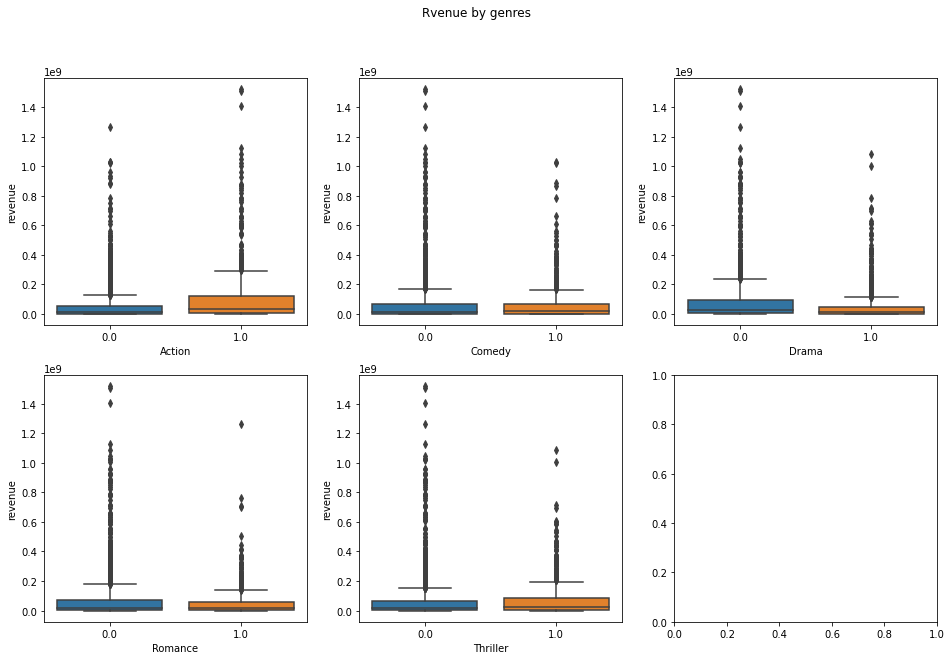

In [35]:
# the effect of genre on revenue
# I selected main genres (at least 20% of the movies are categorized to the genre)
# Action, Comedy, Drama, Romance and Thriller 

fig, axes = plt.subplots(2,3, figsize=(16,10))
fig.suptitle('Rvenue by genres')
sns.boxplot(ax=axes[0, 0], x="Action", y= "revenue", data = movies_df)
sns.boxplot(ax=axes[0, 1], x="Comedy", y= "revenue", data = movies_df)
sns.boxplot(ax=axes[0, 2], x="Drama", y= "revenue", data = movies_df)
sns.boxplot(ax=axes[1, 0], x="Romance", y= "revenue", data = movies_df)
sns.boxplot(ax=axes[1, 1], x="Thriller", y= "revenue", data = movies_df)

In [36]:
genre_name = ['Action', 'Comedy', 'Drama', 'Romance', 'Thriller']
for genre in genre_name:
    x1 = movies_df.revenue[movies_df[genre] == 1].dropna()
    x2 = movies_df.revenue[movies_df[genre] == 0].dropna()
    print("Mean Revenue for %s movies:" %(genre), np.mean(x1))
    print("Mean Revenue for non-%s movies:" %(genre), np.mean(x2))
    print("Mann-Whitney results for %s is:" %(genre), stats.mannwhitneyu(x1,x2)[0])
    print("p-value for %s is:" %(genre), round(stats.mannwhitneyu(x1,x2)[1], 4))
    print("------------------------------")
         

Mean Revenue for Action movies: 111043446.51417004
Mean Revenue for non-Action movies: 52347507.05728242
Mann-Whitney results for Action is: 614784.5
p-value for Action is: 0.0
------------------------------
Mean Revenue for Comedy movies: 60875742.9192607
Mean Revenue for non-Comedy movies: 70020109.94351146
Mann-Whitney results for Comedy is: 968657.0
p-value for Comedy is: 0.0327
------------------------------
Mean Revenue for Drama movies: 45406073.93272371
Mean Revenue for non-Drama movies: 89365992.18125854
Mann-Whitney results for Drama is: 897124.5
p-value for Drama is: 0.0
------------------------------
Mean Revenue for Romance movies: 52705007.38353765
Mean Revenue for non-Romance movies: 70220982.8835673
Mann-Whitney results for Romance is: 657274.5
p-value for Romance is: 0.0328
------------------------------
Mean Revenue for Thriller movies: 68336641.40177439
Mean Revenue for non-Thriller movies: 66357608.754083484
Mann-Whitney results for Thriller is: 788803.5
p-value for

### 5. Outliers

I choose to test only continuous variables. 
For the catrgorical columns and for year, month and day, I didn't see any extream values that look suspicious.

<AxesSubplot:xlabel='revenue'>

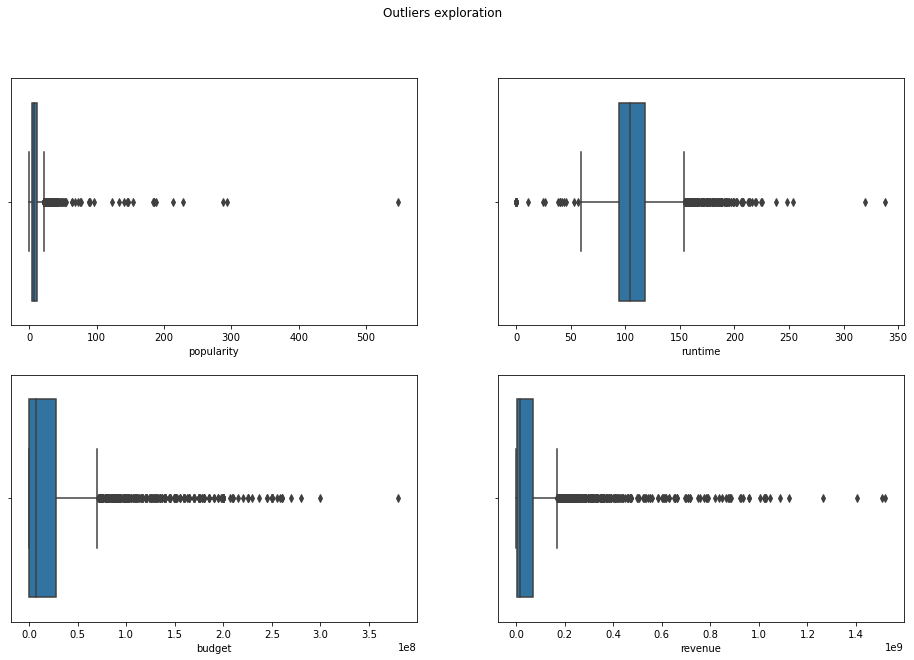

In [37]:
fig, axes = plt.subplots(2,2, figsize=(16,10))
fig.suptitle('Outliers exploration')
sns.boxplot(ax=axes[0, 0], x="popularity", data = movies_df)
sns.boxplot(ax=axes[0, 1], x="runtime", data = movies_df)
sns.boxplot(ax=axes[1, 0], x="budget", data = movies_df)
sns.boxplot(ax=axes[1,1], x="revenue", data = movies_df)

<AxesSubplot:xlabel='actors_male_count'>

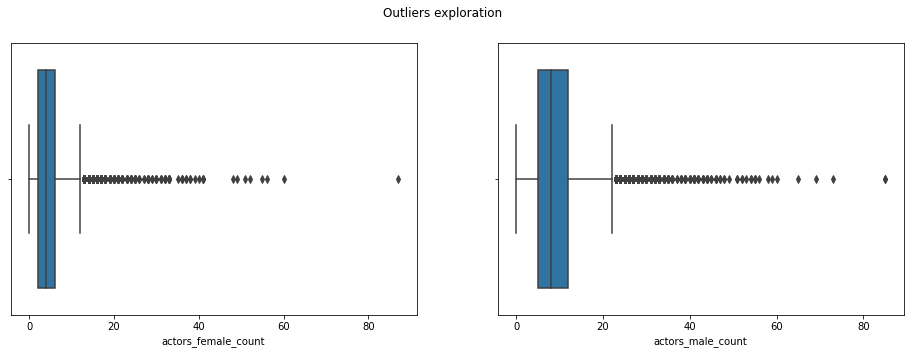

In [38]:
fig, axes = plt.subplots(1,2, figsize=(16,5))
fig.suptitle('Outliers exploration')
sns.boxplot(ax=axes[0], x="actors_female_count", data = movies_df)
sns.boxplot(ax=axes[1], x="actors_male_count", data = movies_df)

### 6. Missing values

In [39]:
# set 0's as null
movies_df.budget[movies_df.budget == 0] = np.nan
movies_df.runtime[movies_df.runtime == 0] = np.nan 
movies_df.actors_female_count[(movies_df.actors_female_count == 0) & (movies_df.actors_male_count == 0)] = np.nan
movies_df.actors_male_count[(movies_df.actors_male_count == 0) & (movies_df.actors_female_count == 0)] = np.nan
movies_df.rev_budg_ratio[movies_df.rev_budg_ratio == 999] = np.nan


<ipython-input-39-7a69021e6403>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df.budget[movies_df.budget == 0] = np.nan
<ipython-input-39-7a69021e6403>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df.runtime[movies_df.runtime == 0] = np.nan
<ipython-input-39-7a69021e6403>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df.actors_female_count[(movies_df.actors_female_count == 0) & (movies_df.actors_male_coun

In [40]:
movies_df.isnull().sum()

original_title             0
original_language          0
original_is_en             0
en                        62
fr                        62
es                        62
de                        62
ru                        62
it                        62
ja                        62
popularity                 0
popularity_cat             0
release_year               1
release_month              1
release_day                1
runtime                   27
runtime_cat                0
status                     2
Action                    23
Adventure                 23
Animation                 23
Comedy                    23
Crime                     23
Documentary               23
Drama                     23
Family                    23
Fantasy                   23
Foreign                   23
History                   23
Horror                    23
Music                     23
Mystery                   23
Romance                   23
Science Fiction           23
Thriller      

### 7. Missing values Heatmap

In [41]:
movies_columns = list(movies_df.columns)
movies_copy = movies_df.copy()

for col in movies_df.columns:
    new_col_name = col+"_nulls"
    movies_copy[new_col_name] = 0
    movies_copy.loc[(movies_copy[col].isnull()),[new_col_name]] = 1
    
movies_copy.drop(columns=movies_columns, inplace=True)
    
movies_copy.head(10) 

,original_title_nulls,original_language_nulls,original_is_en_nulls,en_nulls,fr_nulls,es_nulls,de_nulls,ru_nulls,it_nulls,ja_nulls,popularity_nulls,popularity_cat_nulls,release_year_nulls,release_month_nulls,release_day_nulls,runtime_nulls,runtime_cat_nulls,status_nulls,Action_nulls,Adventure_nulls,Animation_nulls,Comedy_nulls,Crime_nulls,Documentary_nulls,Drama_nulls,Family_nulls,Fantasy_nulls,Foreign_nulls,History_nulls,Horror_nulls,Music_nulls,Mystery_nulls,Romance_nulls,Science Fiction_nulls,Thriller_nulls,TV Movie_nulls,War_nulls,Western_nulls,Art_nulls,Camera_nulls,Costume & Make-Up_nulls,Crew_nulls,Directing_nulls,Editing_nulls,Lighting_nulls,Production_nulls,Sound_nulls,Visual Effects_nulls,Writing_nulls,actors_female_count_nulls,actors_male_count_nulls,revenue_nulls,budget_nulls,revenue_year_rank_nulls,yearly_revenue_sum_nulls,revenue_year_percent_nulls,rev_budg_ratio_nulls
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


<AxesSubplot:ylabel='id'>

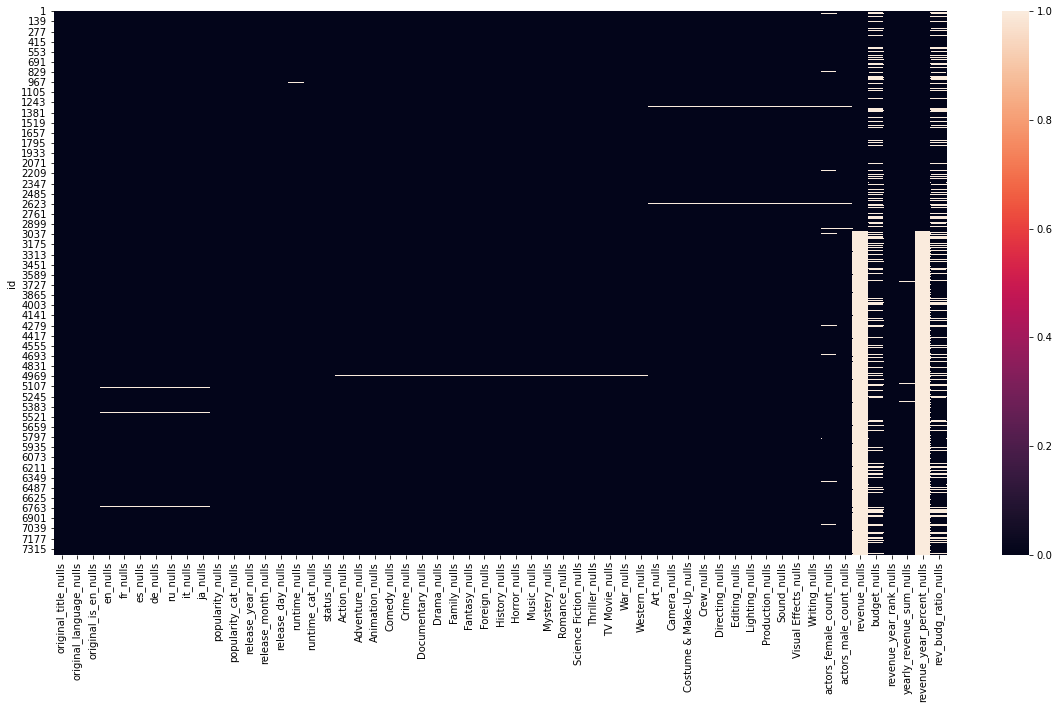

In [42]:
plt.figure(figsize=(20,10))
sns.heatmap(movies_copy)

The outcome variable 'revenue' has more than 60% missing values. the pattern seems to be arbitrary.
The 'budget' variable has a lot of missing values (~30%), the Missing Mechanism should be further explored to decide how to treat NA.

### 3. Data Cleansing

### 3.1 Outliers

<AxesSubplot:xlabel='revenue', ylabel='Count'>

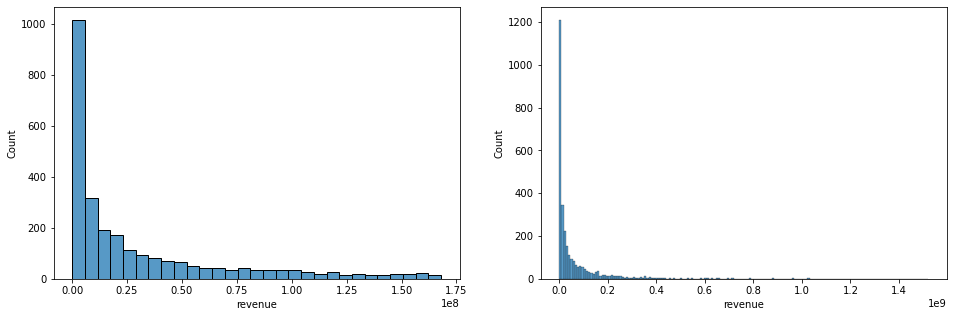

In [43]:
#revenue
q1 = np.nanpercentile(movies_df['revenue'], 25)
q3 = np.nanpercentile(movies_df['revenue'], 75)
iqr = q3 - q1
low = q1 - 1.5*iqr
high = q3 + 1.5*iqr
revenue = movies_df.revenue[(movies_df['revenue'] >= low) & (movies_df['revenue'] <= high)]

fig, axes = plt.subplots(1,2, figsize=(16,5))
sns.histplot(revenue, ax=axes[0])
sns.histplot(movies_df['revenue'], ax=axes[1])

<AxesSubplot:xlabel='popularity', ylabel='revenue'>

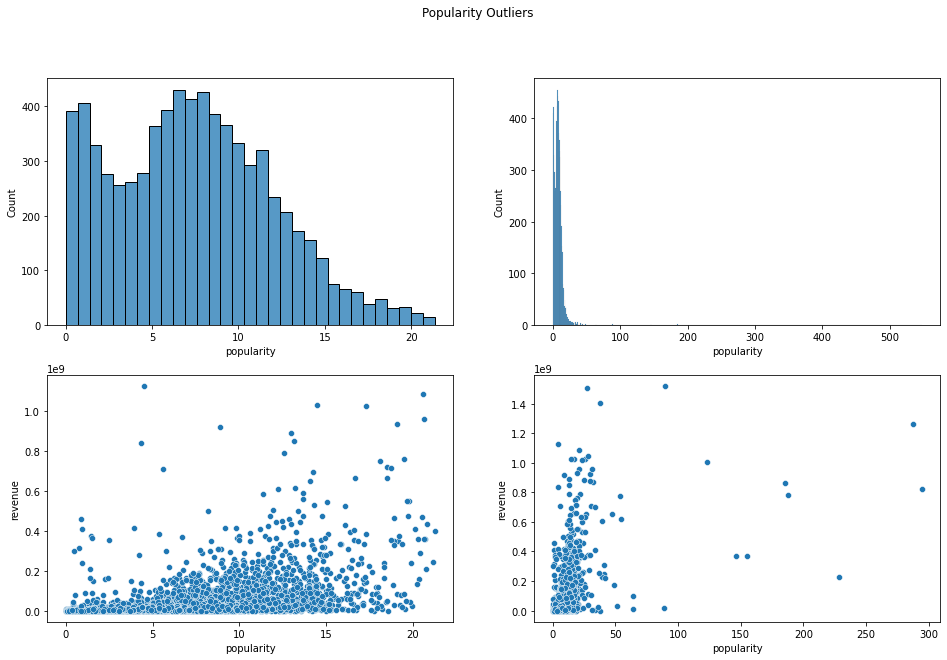

In [44]:
#popularity
q3, q1 = np.percentile(movies_df['popularity'], [75 ,25])
iqr = q3 - q1
popularity = movies_df.popularity[movies_df['popularity'] <= (q3 + 1.5*iqr)]

fig, axes = plt.subplots(2,2, figsize=(16,10))
fig.suptitle('Popularity Outliers ')
sns.histplot(popularity, ax=axes[0,0])
sns.histplot(movies_df['popularity'], ax=axes[0,1])
sns.scatterplot(x =popularity, y = movies_df['revenue'], ax=axes[1,0])
sns.scatterplot(x =movies_df['popularity'], y = movies_df['revenue'], ax=axes[1,1])

In [45]:
# test if removing outliers change the distribution 
from scipy.stats import ks_2samp
res = ks_2samp(movies_df['popularity'], popularity)
print("p-value=", res[1])

p-value= 0.008929140155029103


<AxesSubplot:xlabel='runtime', ylabel='revenue'>

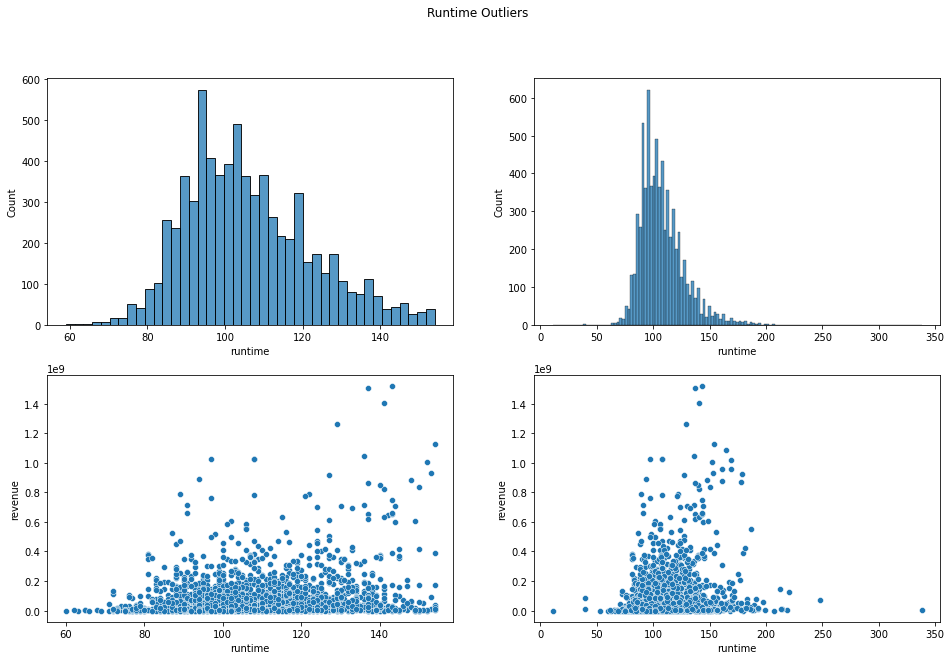

In [46]:
#runtime
q1 = np.nanpercentile(movies_df['runtime'], 25)
q3 = np.nanpercentile(movies_df['runtime'], 75)
iqr = q3 - q1
low = q1 - 1.5*iqr
high = q3 + 1.5*iqr
runtime = movies_df.runtime[(movies_df['runtime'] >= low) & (movies_df['runtime'] <= high)]

fig, axes = plt.subplots(2,2, figsize=(16,10))
fig.suptitle('Runtime Outliers ')
sns.histplot(runtime, ax=axes[0,0])
sns.histplot(movies_df['runtime'], ax=axes[0,1])
sns.scatterplot(x =runtime, y = movies_df['revenue'], ax=axes[1,0])
sns.scatterplot(x =movies_df['runtime'], y = movies_df['revenue'], ax=axes[1,1])

<AxesSubplot:xlabel='budget', ylabel='revenue'>

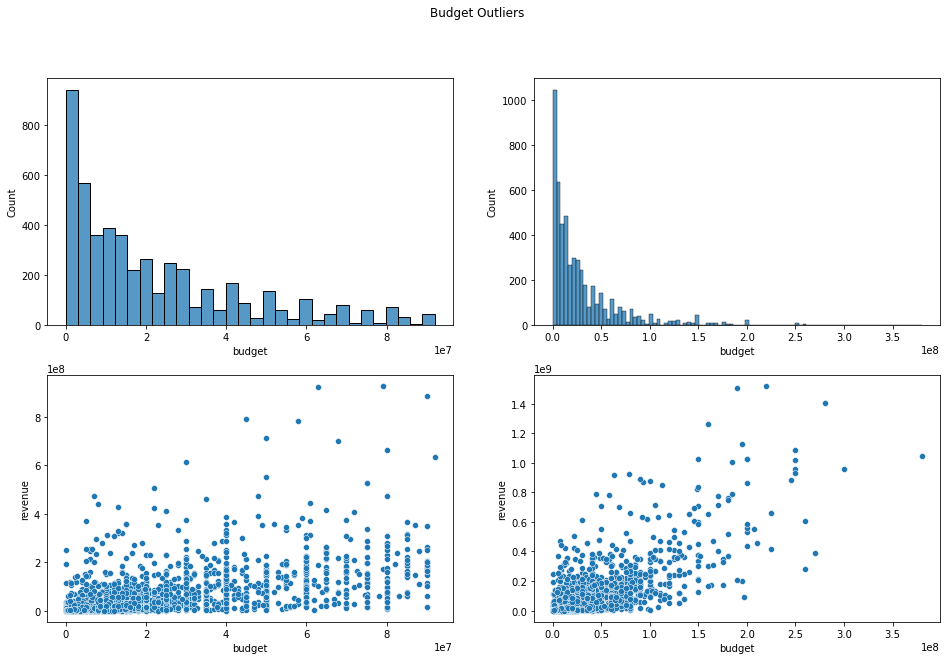

In [47]:
#budget
q1 = np.nanpercentile(movies_df['budget'], 25)
q3 = np.nanpercentile(movies_df['budget'], 75)
iqr = q3 - q1
low = q1 - 1.5*iqr
high = q3 + 1.5*iqr
budget = movies_df.budget[(movies_df['budget'] >= low) & (movies_df['budget'] <= high)]

fig, axes = plt.subplots(2,2, figsize=(16,10))
fig.suptitle('Budget Outliers ')
sns.histplot(budget, ax=axes[0,0])
sns.histplot(movies_df['budget'], ax=axes[0,1])
sns.scatterplot(x =budget, y = movies_df['revenue'], ax=axes[1,0])
sns.scatterplot(x =movies_df['budget'], y = movies_df['revenue'], ax=axes[1,1])

<AxesSubplot:xlabel='actors_female_count', ylabel='revenue'>

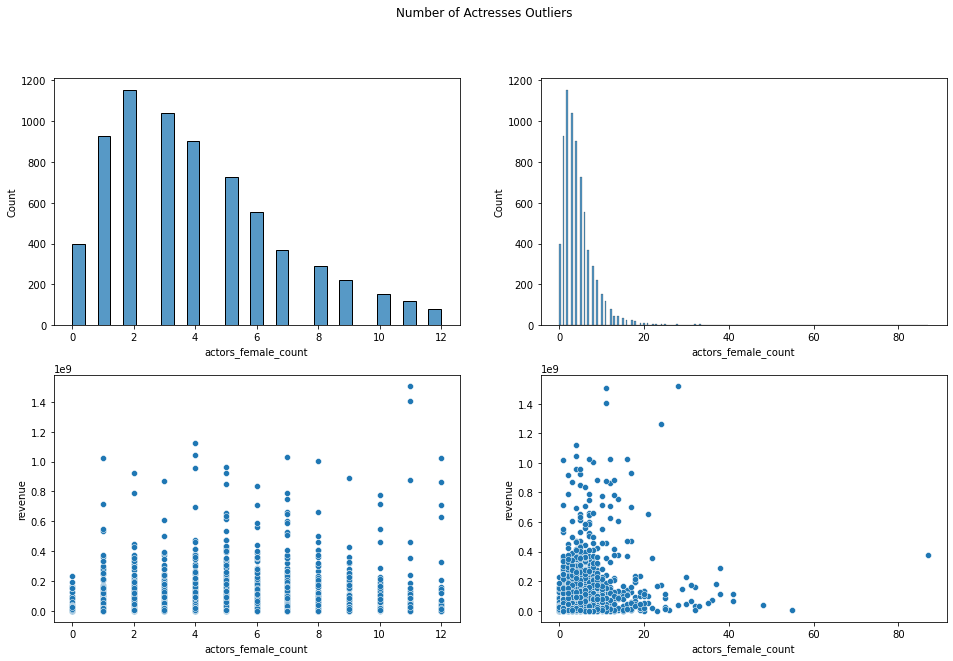

In [48]:
#actors_female_count
q1 = np.nanpercentile(movies_df['actors_female_count'], 25)
q3 = np.nanpercentile(movies_df['actors_female_count'], 75)
iqr = q3 - q1
low = q1 - 1.5*iqr
high = q3 + 1.5*iqr
actors_female_count = movies_df.actors_female_count[(movies_df['actors_female_count'] >= low) & (movies_df['actors_female_count'] <= high)]

fig, axes = plt.subplots(2,2, figsize=(16,10))
fig.suptitle('Number of Actresses Outliers ')
sns.histplot(actors_female_count, ax=axes[0,0])
sns.histplot(movies_df['actors_female_count'], ax=axes[0,1])
sns.scatterplot(x =actors_female_count, y = movies_df['revenue'], ax=axes[1,0])
sns.scatterplot(x =movies_df['actors_female_count'], y = movies_df['revenue'], ax=axes[1,1])

<AxesSubplot:xlabel='actors_male_count', ylabel='revenue'>

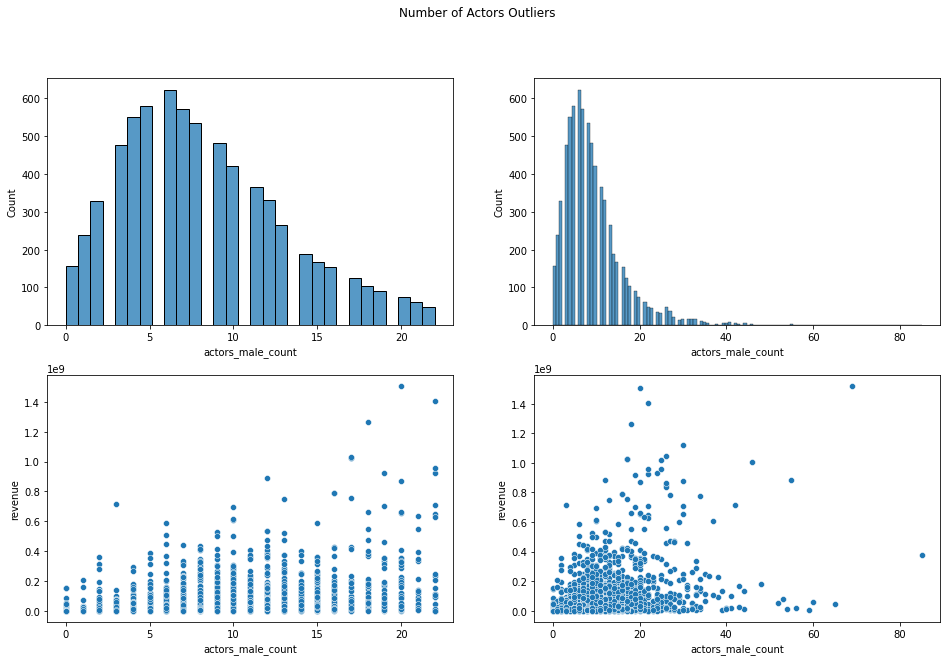

In [49]:
#actors_female_count
q1 = np.nanpercentile(movies_df['actors_male_count'], 25)
q3 = np.nanpercentile(movies_df['actors_male_count'], 75)
iqr = q3 - q1
low = q1 - 1.5*iqr
high = q3 + 1.5*iqr
actors_male_count = movies_df.actors_male_count[(movies_df['actors_male_count'] >= low) & (movies_df['actors_male_count'] <= high)]

fig, axes = plt.subplots(2,2, figsize=(16,10))
fig.suptitle('Number of Actors Outliers ')
sns.histplot(actors_male_count, ax=axes[0,0])
sns.histplot(movies_df['actors_male_count'], ax=axes[0,1])
sns.scatterplot(x =actors_male_count, y = movies_df['revenue'], ax=axes[1,0])
sns.scatterplot(x =movies_df['actors_male_count'], y = movies_df['revenue'], ax=axes[1,1])

<AxesSubplot:xlabel='Directing', ylabel='revenue'>

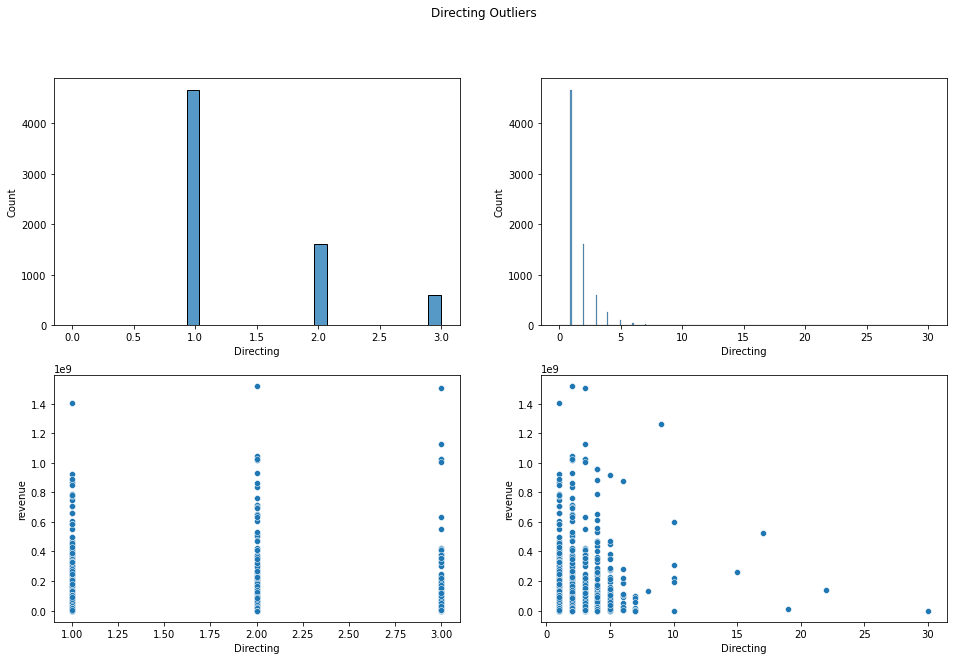

In [50]:
#Directing

q1 = np.nanpercentile(movies_df['Directing'], 25)
q3 = np.nanpercentile(movies_df['Directing'], 75)
iqr = q3 - q1
low = q1 - 1.5*iqr
high = q3 + 1.5*iqr
Directing = movies_df.Directing[(movies_df['Directing'] <= high)]

fig, axes = plt.subplots(2,2, figsize=(16,10))
fig.suptitle('Directing Outliers ')
sns.histplot(Directing, ax=axes[0,0])
sns.histplot(movies_df['Directing'], ax=axes[0,1])
sns.scatterplot(x =Directing, y = movies_df['revenue'], ax=axes[1,0])
sns.scatterplot(x =movies_df['Directing'], y = movies_df['revenue'], ax=axes[1,1])

<AxesSubplot:xlabel='Production', ylabel='revenue'>

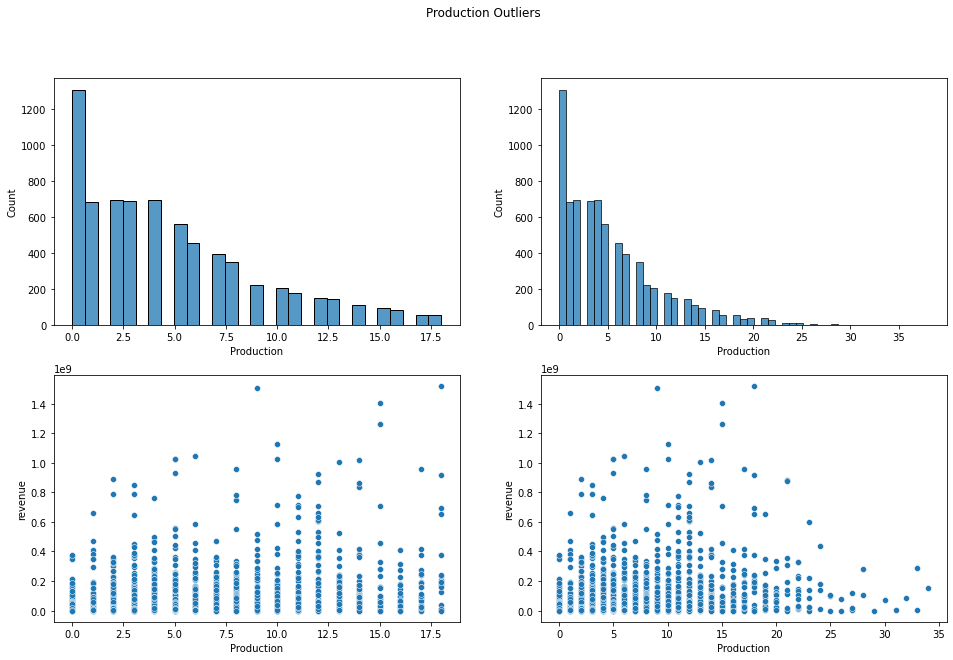

In [51]:
#Production

q1 = np.nanpercentile(movies_df['Production'], 25)
q3 = np.nanpercentile(movies_df['Production'], 75)
iqr = q3 - q1
low = q1 - 1.5*iqr
high = q3 + 1.5*iqr
Production = movies_df.Production[(movies_df['Production'] >= low) & (movies_df['Production'] <= high)]
#revnue_1 =  movies_df.loc[(movies_df['Production'] >= low) & (movies_df['Production'] <= high), ['revenue']]
#print(len(Production))
#print(len(revnue_1))

fig, axes = plt.subplots(2,2, figsize=(16,10))
fig.suptitle('Production Outliers ')
sns.histplot(Production, ax=axes[0,0])
sns.histplot(movies_df['Production'], ax=axes[0,1])
sns.scatterplot(x =Production, y = movies_df['revenue'], ax=axes[1,0])
sns.scatterplot(x =movies_df['Production'], y = movies_df['revenue'], ax=axes[1,1])

<AxesSubplot:xlabel='Writing', ylabel='revenue'>

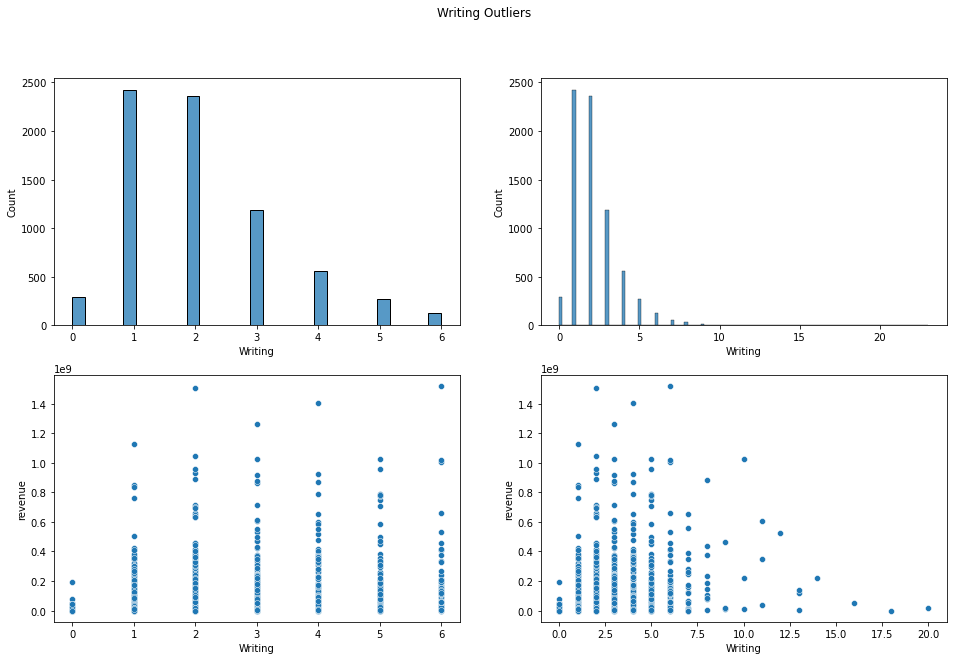

In [52]:
#Writing

q1 = np.nanpercentile(movies_df['Writing'], 25)
q3 = np.nanpercentile(movies_df['Writing'], 75)
iqr = q3 - q1
low = q1 - 1.5*iqr
high = q3 + 1.5*iqr
Writing = movies_df.Writing[(movies_df['Writing'] >= low) & (movies_df['Writing'] <= high)]

fig, axes = plt.subplots(2,2, figsize=(16,10))
fig.suptitle('Writing Outliers ')
sns.histplot(Writing, ax=axes[0,0])
sns.histplot(movies_df['Writing'], ax=axes[0,1])
sns.scatterplot(x =Writing, y = movies_df['revenue'], ax=axes[1,0])
sns.scatterplot(x =movies_df['Writing'], y = movies_df['revenue'], ax=axes[1,1])

In [54]:
# Kolmogorov-Smirnov test for differences in distribution
col_names_3 = ['popularity', 'runtime','budget','Directing', 'Production', 'Writing', 'actors_female_count', 'actors_male_count', 'revenue']
no_outliers_list = [popularity, runtime, budget, Directing, Production, Writing, actors_female_count, actors_male_count, revenue]

ks_pvalues = []
for i in range(len(col_names_3)):
    res = ks_2samp(movies_df[col_names_3[i]], no_outliers_list[i])
    ks_pvalues.append(res[1])


#df1 = pd.DataFrame({"column": col_names_3, "K-S_p-values": ks_pvalues} )
#df1

In [55]:
#Correltation test with and without outliers

spearman_with_Outliers = []
p_value_with_Outliers =[]
spearman_no_Outliers = []
p_value_no_Outliers = []
mean_before =[]
mean_after = []

for col in col_names_3:
    q1 = np.nanpercentile(movies_df[col], 25)
    q3 = np.nanpercentile(movies_df[col], 75)
    iqr = q3 - q1
    low = q1 - 1.5*iqr
    high = q3 + 1.5*iqr
    no_outliers = movies_df.loc[(movies_df[col] >= low) & (movies_df[col] <= high), [col]]
    revenue_1 =  movies_df.loc[(movies_df[col] >= low) & (movies_df[col] <= high), ['revenue']]
    spearman_1 = stats.spearmanr(movies_df[col], movies_df['revenue'], nan_policy='omit')
    spearman_2 = stats.spearmanr(no_outliers, revenue_1, nan_policy='omit')
    spearman_with_Outliers.append(spearman_1[0])
    p_value_with_Outliers.append(spearman_1[1])
    spearman_no_Outliers.append(spearman_2[0])
    p_value_no_Outliers.append(spearman_2[1])
    mean_before.append(movies_df[col].mean())
    mean_after.append(no_outliers.mean()[0])

Outliers_df = pd.DataFrame({"Column": col_names_3, "K-S_p-values": ks_pvalues, "mean": mean_before, "mean_no_Outlires": mean_after, 
                            "corr_with_Outliers":spearman_with_Outliers, "p_with_Outliers":p_value_with_Outliers, 
                            "corr_no_Outliers":spearman_no_Outliers, "p_no_Outliers":p_value_no_Outliers})    

In [56]:
Outliers_df

,Column,K-S_p-values,mean,mean_no_Outlires,corr_with_Outliers,p_with_Outliers,corr_no_Outliers,p_no_Outliers
0,popularity,8.929140e-03,8.514968e+00,7.445606e+00,0.596192,2.941133e-288,0.578149,4.356562e-261
1,runtime,1.065111e-04,1.080241e+02,1.058698e+02,0.259552,3.601386e-47,0.262590,1.680687e-46
2,budget,4.639987e-01,3.110802e+07,2.209270e+07,0.707508,0.000000e+00,0.653389,6.038204e-248
3,Directing,6.328271e-15,1.663723e+00,1.411277e+00,0.262704,2.740383e-48,0.223292,8.530478e-33
4,Production,3.931162e-04,5.288995e+00,4.774388e+00,0.398575,3.472828e-114,0.387781,1.078160e-104
5,Writing,2.585098e-02,2.218614e+00,2.083541e+00,0.276503,1.659118e-53,0.264136,4.487691e-48
6,actors_female_count,1.910694e-13,4.693816e+00,3.981789e+00,0.341988,3.791281e-81,0.318750,2.327045e-67
7,actors_male_count,1.383005e-12,9.413055e+00,8.163206e+00,0.492172,2.902292e-181,0.469933,7.296616e-155
8,revenue,1.000000e+00,6.672585e+07,3.037773e+07,1.000000,0.000000e+00,1.000000,0.000000e+00


#### Outlires treatmant
The K-S test shows that all variables have a change in the distribution, but the association is similar, therefore they can be droped (trun to NA)

### 3.2 Missing Values

According to the result of question 6, The 'revenue' column has more than 60% missing, therefore we can't imputate it.
There are many variables with only a few missing data:
all languages have the same number of missing data, all genres have the same number of missing data, and all departments have the same number of missing data. It could imply that the missing data is from the same rows. Since there are so few data missing in these columns, the effect is minimal therefore we can drop the lines or fill the missing with mean (or the mode in case of categorical columns).

In [57]:
#Languages
en_missing = movies_df[movies_df['en'].isnull()].index.tolist()
fr_missing = movies_df[movies_df['fr'].isnull()].index.tolist()
es_missing = movies_df[movies_df['es'].isnull()].index.tolist()
de_missing = movies_df[movies_df['de'].isnull()].index.tolist()

en_missing.sort()
fr_missing.sort()
es_missing.sort()
de_missing.sort()
print(en_missing == fr_missing)
print(en_missing == es_missing)
print(en_missing == de_missing)

True
True
True


In [59]:
#Genres
Action_missing = movies_df[movies_df['Action'].isnull()].index.tolist()
Drama_missing = movies_df[movies_df['Drama'].isnull()].index.tolist()
Romance_missing = movies_df[movies_df['Romance'].isnull()].index.tolist()
Comedy_missing = movies_df[movies_df['Comedy'].isnull()].index.tolist()

Action_missing.sort()
Drama_missing.sort()
Romance_missing.sort()
Comedy_missing.sort()

print(Action_missing == Drama_missing)
print(Action_missing == Romance_missing)
print(Action_missing == Comedy_missing)

True
True
True


In [60]:
#Departments
Art_missing = movies_df[movies_df['Art'].isnull()].index.tolist()
Camera_missing = movies_df[movies_df['Camera'].isnull()].index.tolist()
Crew_missing = movies_df[movies_df['Crew'].isnull()].index.tolist()
Sound_missing = movies_df[movies_df['Sound'].isnull()].index.tolist()

Art_missing.sort()
Camera_missing.sort()
Crew_missing.sort()
Sound_missing.sort()

print(Art_missing == Camera_missing)
print(Art_missing == Crew_missing)
print(Art_missing == Sound_missing)

True
True
True


In [61]:
movies_columns = list(movies_df.columns)
movies_missing = movies_df.copy()

for col in movies_columns:
    new_col_name = col+"_nulls"
    movies_missing[new_col_name] = 0
    movies_missing.loc[(movies_missing[col].isnull()),[new_col_name]] = 1

movies_missing["budget_nulls"] = pd.Categorical(movies_missing["budget_nulls"])


In [62]:
movies_missing.head()

,original_title,original_language,original_is_en,en,fr,es,de,ru,it,ja,popularity,popularity_cat,release_year,release_month,release_day,runtime,runtime_cat,status,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,TV Movie,War,Western,Art,Camera,Costume & Make-Up,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,Writing,actors_female_count,actors_male_count,revenue,budget,revenue_year_rank,yearly_revenue_sum,revenue_year_percent,rev_budg_ratio,original_title_nulls,original_language_nulls,original_is_en_nulls,en_nulls,fr_nulls,es_nulls,de_nulls,ru_nulls,it_nulls,ja_nulls,popularity_nulls,popularity_cat_nulls,release_year_nulls,release_month_nulls,release_day_nulls,runtime_nulls,runtime_cat_nulls,status_nulls,Action_nulls,Adventure_nulls,Animation_nulls,Comedy_nulls,Crime_nulls,Documentary_nulls,Drama_nulls,Family_nulls,Fantasy_nulls,Foreign_nulls,History_nulls,Horror_nulls,Music_nulls,Mystery_nulls,Romance_nulls,Science Fiction_nulls,Thriller_nulls,TV Movie_nulls,War_nulls,Western_nulls,Art_nulls,Camera_nulls,Costume & Make-Up_nulls,Crew_nulls,Directing_nulls,Editing_nulls,Lighting_nulls,Production_nulls,Sound_nulls,Visual Effects_nulls,Writing_nulls,actors_female_count_nulls,actors_male_count_nulls,revenue_nulls,budget_nulls,revenue_year_rank_nulls,yearly_revenue_sum_nulls,revenue_year_percent_nulls,rev_budg_ratio_nulls
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Hot Tub Time Machine 2,en,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.575393,High,2015.0,2.0,20.0,93.0,Short,Released,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,8.0,13.0,4.0,4.0,2.0,4.0,9.0,10.0,4.0,2.0,8.0,10.0,12314651.0,14000000.0,72,1.329334e+10,0.09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,The Princess Diaries 2: Royal Engagement,en,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.248895,High,2004.0,8.0,6.0,113.0,Medium,Released,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,1.0,0.0,1.0,10.0,10.0,95149435.0,40000000.0,26,6.665570e+09,1.43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Whiplash,en,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,64.299988,Superb,2014.0,10.0,10.0,105.0,Medium,Released,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,5.0,9.0,3.0,6.0,1.0,18.0,9.0,3.0,1.0,7.0,13.0,13092000.0,3300000.0,58,9.432880e+09,0.14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Kahaani,hi,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.174936,Medium,2012.0,3.0,9.0,122.0,Long,Released,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,16000000.0,1200000.0,63,1.077075e+10,0.15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,????,ko,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.148070,Low,2009.0,2.0,5.0,118.0,Medium,Released,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,3923970.0,NaN,78,8.204226e+09,0.05,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


#### The 'budget' variable has a lot of missing values (~30%), the Missing Mechanism should be further explored to decide how to treat NA.
#### I look for differences in the distribution of other variables between missing and nonmissing.

<AxesSubplot:xlabel='popularity', ylabel='Count'>

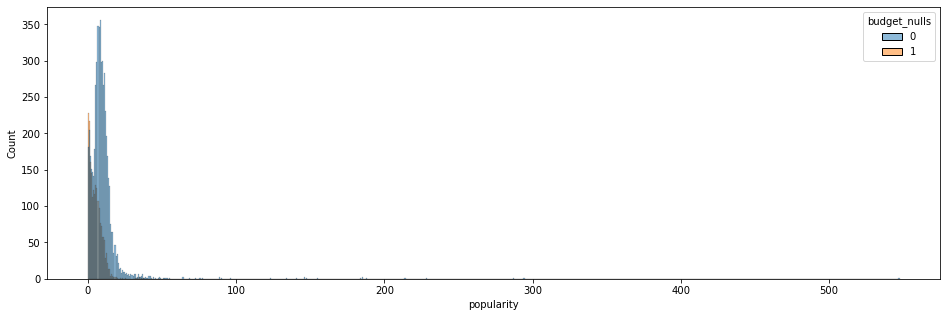

In [63]:
#popularity vs. Budget
plt.figure(figsize=(16,5))
sns.histplot(data = movies_missing, x = "popularity", hue= "budget_nulls")

<AxesSubplot:xlabel='popularity', ylabel='Count'>

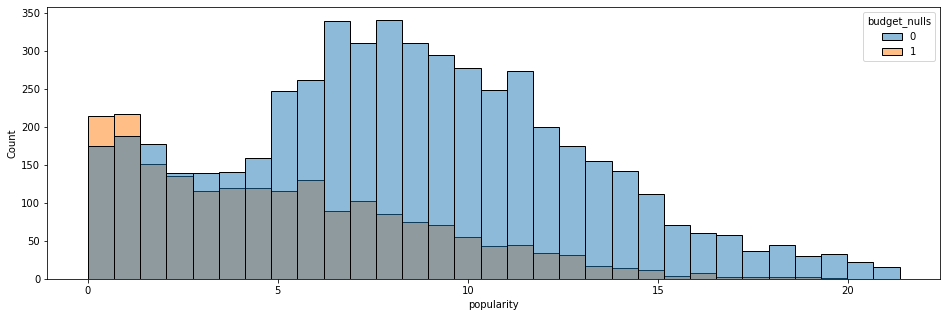

In [64]:
#popularity vs. Budget
q3, q1 = np.percentile(movies_df['popularity'], [75 ,25])
iqr = q3 - q1
popularity = movies_missing.popularity[movies_missing['popularity'] <= (q3 + 1.5*iqr)]

fig, axes = plt.subplots(figsize=(16,5))
sns.histplot(data = movies_missing, x= popularity, hue= "budget_nulls")

<AxesSubplot:xlabel='runtime', ylabel='Count'>

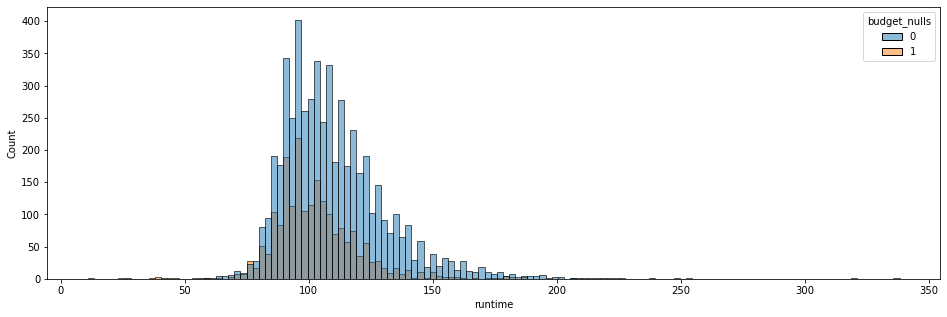

In [65]:
#runtime vs. Budget
plt.figure(figsize=(16,5))
sns.histplot(data = movies_missing, x = "runtime", hue= "budget_nulls")

<AxesSubplot:xlabel='release_year', ylabel='Count'>

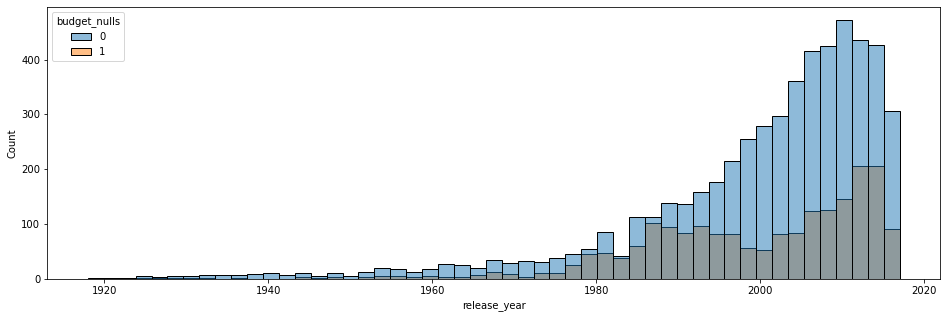

In [66]:
#year vs. Budget
plt.figure(figsize=(16,5))
sns.histplot(data = movies_missing, x = "release_year", hue= "budget_nulls")

<AxesSubplot:xlabel='release_month', ylabel='Count'>

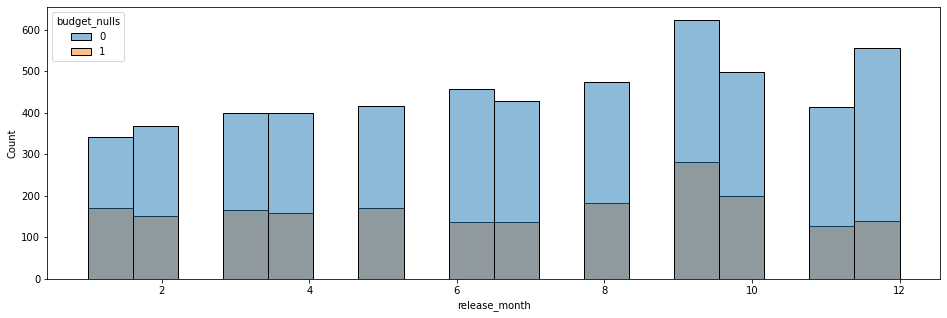

In [67]:
#month vs. Budget
plt.figure(figsize=(16,5))
sns.histplot(data = movies_missing, x = "release_month", hue= "budget_nulls")

<AxesSubplot:xlabel='original_language', ylabel='Count'>

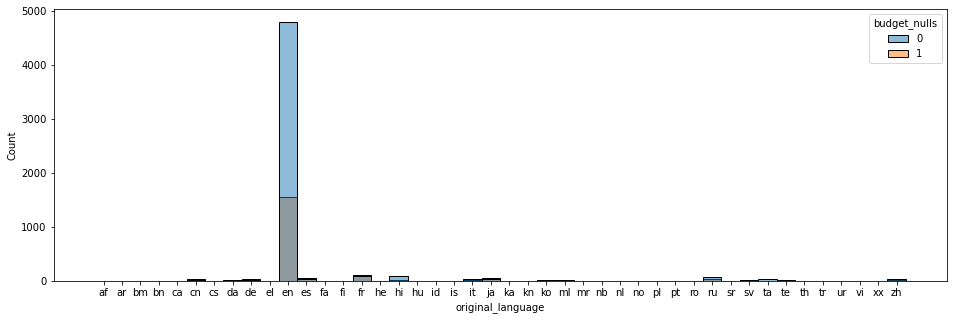

In [68]:
#original_language vs. Budget
plt.figure(figsize=(16,5))
sns.histplot(data = movies_missing, x = "original_language", hue= "budget_nulls")

<AxesSubplot:xlabel='revenue', ylabel='Count'>

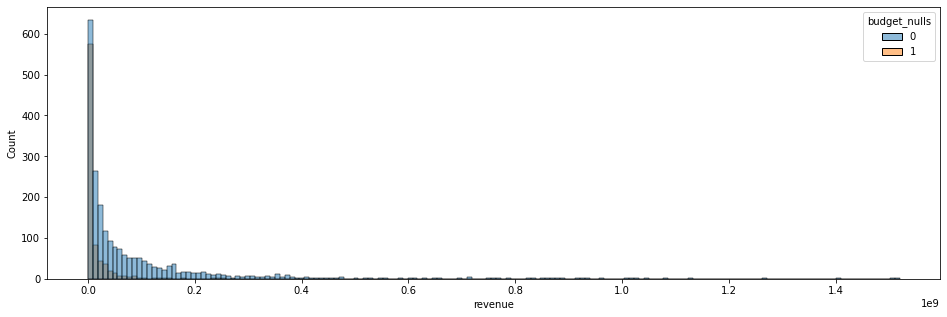

In [69]:
#revenue vs. Budget
plt.figure(figsize=(16,5))
sns.histplot(data = movies_missing, x = "revenue", hue= "budget_nulls")

In [70]:
#K-S test to find if MAR of MNAR - "budget"
numeric_cols = movies_df.select_dtypes(include='number').columns.tolist()
ks_pvalues_missing = []

for col in numeric_cols:
    c1 = movies_missing.loc[(movies_missing["budget_nulls"]==0), [col]]
    c2 = movies_missing.loc[(movies_missing["budget_nulls"]==1), [col]]
    res = ks_2samp(c1[col], c2[col])
    ks_pvalues_missing.append(res[1])
    
missing_df = pd.DataFrame({"Column": numeric_cols, "KS_p-value": ks_pvalues_missing})  
missing_df

,Column,KS_p-value
0,popularity,4.440892e-16
1,release_year,4.440892e-15
2,release_month,2.204213e-03
3,release_day,8.492195e-02
4,runtime,4.440892e-16
5,Art,4.440892e-16
6,Camera,4.440892e-16
7,Costume & Make-Up,4.440892e-16
8,Crew,4.440892e-16
9,Directing,4.440892e-16


The budget is not missing at random (MNAR), therefore we can't do imputation but turn to categorical with a category for missing values.

In [71]:
movies_df['budget_cat'] = 'NA'

movies_df.loc[movies_df['budget'].between(0,2e7),'budget_cat'] = 'very_low'
movies_df.loc[movies_df['budget'].between(2e7,4e7),'budget_cat'] = 'low'
movies_df.loc[movies_df['budget'].between(4e7,6e7),'budget_cat'] = 'medium'
movies_df.loc[movies_df['budget'].between(6e7,8e7),'budget_cat'] = 'high'
movies_df.loc[movies_df['budget']> 8e7,'budget_cat'] = 'very_high'
movies_df.loc[movies_df['budget']== np.nan,'budget_cat'] = 'NA'

movies_df.tail(30)

,original_title,original_language,original_is_en,en,fr,es,de,ru,it,ja,popularity,popularity_cat,release_year,release_month,release_day,runtime,runtime_cat,status,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,TV Movie,War,Western,Art,Camera,Costume & Make-Up,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,Writing,actors_female_count,actors_male_count,revenue,budget,revenue_year_rank,yearly_revenue_sum,revenue_year_percent,rev_budg_ratio,budget_cat
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7369,Jane Got a Gun,en,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.826071,High,2016.0,1.0,1.0,98.0,Medium,Released,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,7.0,1.0,1.0,3.0,1.0,10.0,NaN,25000000.0,126,9.348125e+09,NaN,0,low
7370,Doomsday,en,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.436536,Superb,2008.0,3.0,14.0,108.0,Medium,Released,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,20.0,9.0,10.0,21.0,3.0,2.0,1.0,10.0,12.0,4.0,1.0,15.0,31.0,NaN,30000000.0,102,8.175453e+09,NaN,0,low
7371,The Omega Code,en,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.789046,Low,1999.0,10.0,15.0,100.0,Medium,Released,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,5.0,3.0,0.0,2.0,1.0,4.0,NaN,NaN,65,5.054548e+09,NaN,NaN,NA
7372,Burlesque,en,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.276539,Superb,2010.0,11.0,23.0,119.0,Medium,Released,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,3.0,1.0,1.0,0.0,2.0,5.0,3.0,1.0,18.0,13.0,NaN,55000000.0,126,7.855118e+09,NaN,0,medium
7373,Hugo,en,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,14.046164,Superb,2011.0,11.0,22.0,126.0,Long,Released,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,10.0,9.0,3.0,4.0,2.0,14.0,17.0,8.0,2.0,4.0,16.0,NaN,170000000.0,125,9.017211e+09,NaN,0,very_high
7374,Carrie,en,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.277692,Superb,1976.0,11.0,3.0,98.0,Medium,Released,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,4.0,3.0,3.0,2.0,1.0,0.0,2.0,4.0,0.0,2.0,9.0,6.0,NaN,1800000.0,8,5.178287e+08,NaN,0,very_low
7375,Thelma & Louise,en,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,14.785388,Superb,1991.0,5.0,24.0,130.0,Long,Released,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,14.0,7.0,7.0,5.0,3.0,1.0,1.0,8.0,7.0,0.0,1.0,4.0,13.0,NaN,16000000.0,43,1.128866e+09,NaN,0,very_low
7376,L'imbalsamatore,it,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.405580,Low,2002.0,9.0,6.0,101.0,Medium,Released,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,3.0,2.0,0.0,NaN,NaN,85,7.373002e+09,NaN,NaN,NA
7377,Kelly's Heroes,en,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,8.418662,High,1970.0,6.0,22.0,144.0,Long,Released,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,2.0,1.0,0.0,4.0,2.0,0.0,1.0,0.0,24.0,NaN,4000000.0,9,2.656409e+08,NaN,0,very_low


<AxesSubplot:>

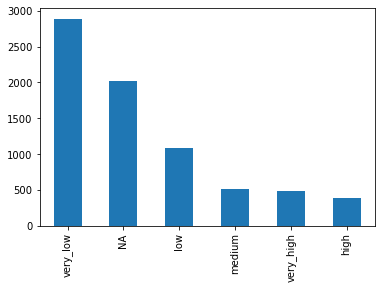

In [72]:
movies_df['budget_cat'].value_counts().plot(kind = 'bar')

In [73]:
###K-S test to find if MAR of MNAR - "revenue"  (just for fun...)
numeric_cols = movies_df.select_dtypes(include='number').columns.tolist()
ks_pvalues_missing = []

for col in numeric_cols:
    c1 = movies_missing.loc[(movies_missing["revenue_nulls"]==0), [col]]
    c2 = movies_missing.loc[(movies_missing["revenue_nulls"]==1), [col]]
    res = ks_2samp(c1[col], c2[col])
    ks_pvalues_missing.append(res[1])
    
missing_df = pd.DataFrame({"Column": numeric_cols, "KS_p-value": ks_pvalues_missing})  
missing_df

,Column,KS_p-value
0,popularity,5.439719e-01
1,release_year,9.076843e-01
2,release_month,1.486587e-01
3,release_day,1.542814e-01
4,runtime,7.048571e-01
5,Art,9.999892e-01
6,Camera,9.672987e-01
7,Costume & Make-Up,9.892694e-01
8,Crew,9.271422e-01
9,Directing,1.000000e+00
